In [1]:
import os
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root = "data/final_rl"

data = []
run_counter = Counter()
data = pd.DataFrame()
for r in os.listdir(root):
    path = os.path.join(root, r)
    env_name, method, *_, size = r.split("_")
    env_name = env_name.replace("-ram", "")
    method = f"{method}_{size}"
    key = f"{env_name}_{method}"
    run_counter[key] += 1
    try:
        rewards = pd.read_csv(os.path.join(path, 'rewards.csv'))
        rewards = rewards[~rewards.test_reward_mean.isnull()]
    except:
        print(path)
        print(os.listdir(path))
        # break
        continue 
    rewards['run'] = run_counter[key]
    rewards['env'] = env_name
    rewards['method'] = method
    rewards['train'] = rewards['train_reward']
    rewards['test'] = rewards['test_reward_median']
    try:
        rewards["n_train_episodes"] = rewards['episode']
    except:
        rewards["n_train_episodes"] = rewards['episode_x']
    rewards["n_train_timesteps"] = rewards['timesteps']
    rewards = rewards[["env","method", "run", "n_train_episodes", "n_train_timesteps", "test", "train"]]
    data = pd.concat([data, rewards])

data.to_pickle("data/rl_data2.pkl")

In [41]:
rewards = pd.read_csv(os.path.join(path, 'rewards.csv'))

,Unnamed: 0,episode,timesteps,train_reward,test_reward_mean,test_reward_median,test_reward_std
4,4,4,4999,-10.070537,-7.142811,-13.976414,12.29
9,9,9,9999,-19.911346,-23.249033,-23.362432,2.05
14,14,14,14999,-18.402138,-22.594501,-23.590771,2.93
19,19,19,19999,-23.431345,-6.454173,-5.653508,10.80
24,24,24,24999,-9.362650,9.240442,12.339938,15.46
...,...,...,...,...,...,...,...
2979,2979,2979,2979999,25.368970,10.649136,7.678244,6.61
2984,2984,2984,2984999,17.670070,18.109627,18.010223,2.69
2989,2989,2989,2989999,14.862273,19.432295,18.904995,1.95
2994,2994,2994,2994999,37.598984,25.712635,25.701794,4.67


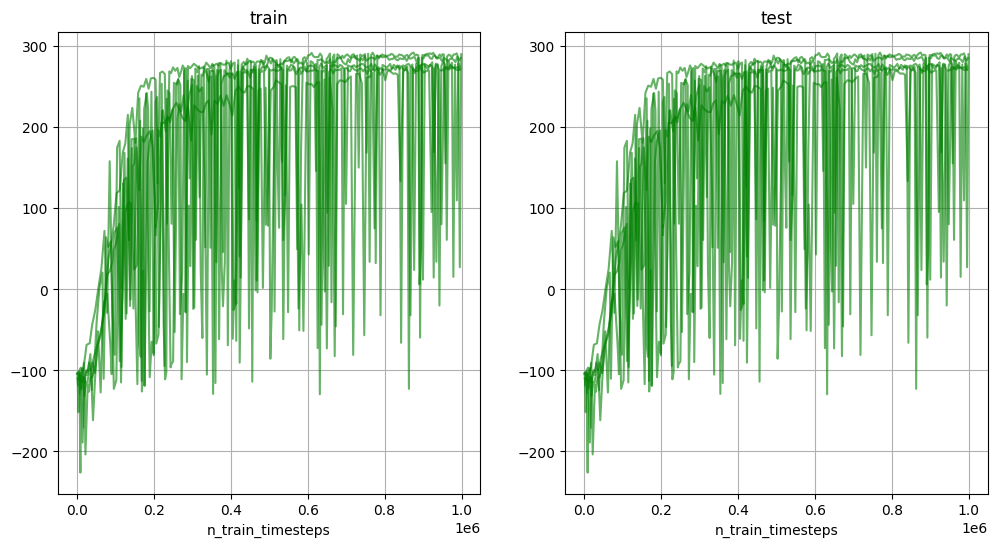

In [56]:
fig, (axes) = plt.subplots(1, 2, figsize=(12,6))


for ax, label in zip(axes, ("train", "test")):
    data[(data.env == 'BipedalWalker-v3') & (data.method == 'ppo_large')].groupby("run")\
        .plot(x="n_train_timesteps", y=label, ax=ax, c='green', alpha=.6)
    ax.grid()
    ax.set_title(label)
    ax.get_legend().remove()

In [18]:
data[data.env.str.endswith("v4")].groupby(["method", "env"])['run'].max()

method     env           
ppo_large  Ant-v4             5
           HalfCheetah-v4     5
           Hopper-v4          5
           Humanoid-v4        5
           Swimmer-v4         5
           Walker2d-v4        5
ppo_small  Ant-v4             5
           HalfCheetah-v4     5
           Hopper-v4          5
           Humanoid-v4        5
           Swimmer-v4         5
           Walker2d-v4        5
sac_large  Ant-v4             5
           HalfCheetah-v4     5
           Hopper-v4          5
           Humanoid-v4        5
           Swimmer-v4         5
sac_small  Ant-v4             5
           HalfCheetah-v4     5
           Hopper-v4         10
           Humanoid-v4        5
           Swimmer-v4         7
Name: run, dtype: int64

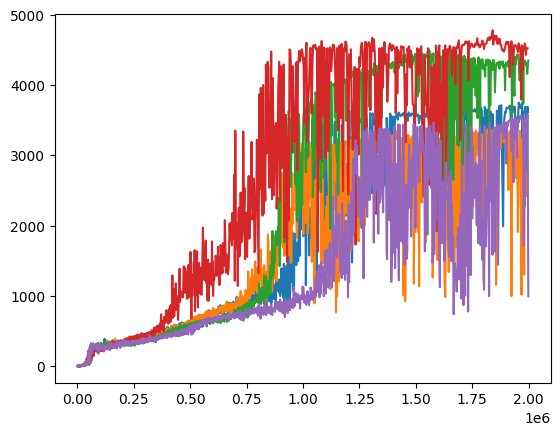

In [31]:
for _, group in data[(data.env == "Walker2d-v4") &  (data.method == "ppo_large")].groupby("run"):
    plt.plot(group.n_train_timesteps, group.test)